### 생선 분류 ==> 최적의 K 찾기 : 하이퍼파라미터
 - 데이터셋 : fish.csv.
 - 피쳐/특성 : Weight, Lenght
 - 타겟/ 라벨 : Species
 - 학습 방법 : 지도 학습 = > 분류
 - 학습 알고리즘 : 최근접이웃알고리즘
 - 하이퍼파라미터 튜닝 : 모델 성능 개선 >> 최적의 K를 찾기위해

In [1]:
# [1] 데이터 준비
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_file = '../data/fish.csv'

In [3]:
# 행 : Bream, Smelt   컬럼 : Species, Weight, Lenght => 0,1,2 
fishDF = pd.read_csv(DATA_file, usecols=[0,1,2])# 컬럼명도 가능
fishDF.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [4]:
mask = (fishDF['Species'] == "Bream")| (fishDF['Species'] == "Smelt")
twoDF = fishDF[mask]
twoDF.reset_index(drop=True, inplace=True)
twoDF.index

RangeIndex(start=0, stop=49, step=1)

In [5]:
# Species 컬럼을 수치화 => Bream 0, Smelt 1
new_cols = twoDF['Species'].replace({'Bream':0, 'Smelt':1})
twoDF['FCode'] = new_cols

C:\Users\KDP-23\AppData\Local\Temp\ipykernel_19220\3829503867.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoDF['FCode'] = new_cols


In [6]:
twoDF.head(1)

,Species,Weight,Length,FCode
0,Bream,242.0,25.4,0


### 2. 피쳐와 타겟 분리

In [7]:
features = twoDF[['Weight','Length']]
target = twoDF['FCode']
print(f'features: {features.shape}, {features.ndim}D')
print(f'target: {target.shape}, {target.ndim}D')

features: (49, 2), 2D
target: (49,), 1D


### 3. 데이터셋 준비 --> 학습용, 테스트용

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# train: test = 80:20 ===> test_size=0.2  또는 train_size = 0.8
# stratfy 메개변수 >> 분류인 경우 사용, 분류 타겟의 종류에 대한 비율을 고려
x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    target,
                                                    test_size=0.2,
                                                    stratify = target,
                                                    random_state=10)

In [10]:
# train : test 80:20체크
print(f'x_train : {x_train.shape}, {x_train.ndim}D')
print(f'y_train : {y_train.shape}, {y_train.ndim}D')

print(f'x_test : {x_test.shape}, {x_test.ndim}D')
print(f'y_test : {y_test.shape}, {y_test.ndim}D')

x_train : (39, 2), 2D
y_train : (39,), 1D
x_test : (10, 2), 2D
y_test : (10,), 1D


In [11]:
# # target 0(Bream), 1(Smelt)의 비율
y_train.value_counts()[0]/y_train.shape[0], y_train.value_counts()[1]/y_train.shape[0]

(0.717948717948718, 0.28205128205128205)

In [12]:
y_test.value_counts()[0]/y_test.shape[0], y_test.value_counts()[1]/y_test.shape[0]

(0.7, 0.3)

#### 3-1 피쳐 스케일링

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
# 스케일러 인스턴스 생성
mmScaler = MinMaxScaler()

In [15]:
# 데이터에 기반한 MinMaxScaler 동작을 위한 학습 진행
mmScaler.fit(x_train)

MinMaxScaler()

In [17]:
mmScaler.min_, mmScaler.data_min_, mmScaler.scale_, mmScaler.data_max_ 
# min_은 변환된 스케일의 하한 값
# data_min_과 data_max_는 원본 데이터의 최소 및 최대값
# scale_은 이 값들을 변환하는 데 필요한 비율

(array([-0.00674519, -0.31410256]),
 array([6.7, 9.8]),
 array([0.00100675, 0.03205128]),
 array([1000.,   41.]))

In [ ]:
# 학습용 데이터셋 ==> 스케일링 ==> ndarray 타입 변환
x_train_Scaler = mmScaler.transform(x_train)
x_train_Scaler.shape

(39, 2)

In [ ]:
# 테스트용 데이터셋 ==> 스케일링 ==> ndarray 타입 변환
x_test_Scaler = mmScaler.transform(x_test)
x_test_Scaler.shape , x_test_Scaler.min(), x_test_Scaler.max()

((10, 2), 0.0033222591362126247, 0.8489882210812445)

### 4 훈련학습 진행
- 학습알고리즘 인스턴스 생성
- 학습 진행  

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# 인스턴스 생성
model = KNeighborsClassifier()

In [ ]:
# 학습진행 ==>  학습용 데이터셋
model.fit(x_train_Scaler, y_train)

KNeighborsClassifier()

In [ ]:
# 학습 후 모델 파라미터
model.classes_
#  model.feature_names_in_,  <== ndarray일 경우 컬럼명 X

array([0, 1], dtype=int64)

In [ ]:
model.n_samples_fit_

39

#### 5. 성능 평가

In [ ]:
model.score(x_test_Scaler, y_test)

1.0

#### 6. 최적의 K 개수 찾기 ==> 모델의 성능 영향 미치는 파리미터 
- 하이퍼 파라미터

In [ ]:
# K의 범위 : 1 ~ 전체 데이터 개수

# scores = []
# for k in range(1,40):
#     # 최근접 이웃 데이터 수 설정
#     # model = KNeighborsClassifier(n.n_neighbors= k) # >> 반복문 돌릴때마다 모델을 새로 만듬
#     model.n_neighbors = k # 데이터 양이 많다면 이렇게는 버겁다
                                
#     # 모델 예측 값 추출
#     model.fit(x_train_Scaler) # 변수 값만 바꾸는거면  y_train값을 넣어줘도 됨

#     # 함수 계산
#     jumsu = model.score(x_test_Scaler, y_test)

In [ ]:
scores, point = [], []
for k in range(1,40):
    # 최근접 이웃 데이터 수 설정
    model.n_neighbors = k # 위에 있는 model을 활용

    # 모델 예측 값 추출
    # model.fit(x_train_Scaler) # 변수 값만 바꾸는거면  y_train값을 넣어줘도 됨

    # 함수 계산 및 저장
    jumsu = model.score(x_test_Scaler, y_test)
    # print(f'[{k}] jumeu => {jumsu}')
    
    if k>1: # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>???? 왜 조건문을 넣어준거지??
        if jumsu != scores[-1]: point.append(k)
    scores.append(jumsu)

In [ ]:
point

[22]

In [ ]:
scores

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7]

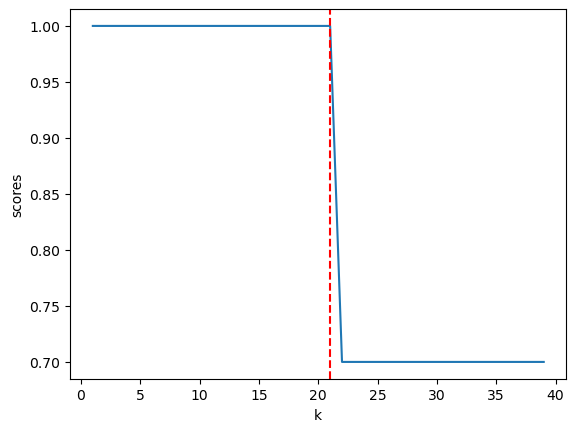

In [ ]:
# x축 K, y축 점수
plt.plot(range(1,40), scores)
plt.xlabel("k")
plt.ylabel('scores')
plt.axvline(point[0]-1, 0.0, 1.0, color = 'red', linestyle= 'dashed') # 수직선
plt.show()

#### 6. 예측 하기  == > 학습/ 훈련과 테스트에 사용되지 않은 데이터 사용
 - 주의 : 입력 데이터 ==> 2D
 

In [ ]:
new_data =pd.DataFrame([[413,27.8]], columns=['Weight', 'Length'])
new_data


,Weight,Length
0,413,27.8


In [ ]:
new_data_mmScaled = mmScaler.transform(new_data)
new_data_mmScaled

array([[0.40904057, 0.57692308]])

In [ ]:
new_data_mmScaled.shape

(1, 2)

In [ ]:
# 임의의 새로운 데이터의 예측
### 최근접한 k개 데이터 찾기
distance, idx = model.kneighbors(new_data_mmScaled)

In [ ]:
distance

array([[0.04209753, 0.06334927, 0.07138647, 0.07421737, 0.07974703,
        0.08448221, 0.10667685, 0.12006426, 0.13283514, 0.13487345,
        0.14742788, 0.15337025, 0.23143819, 0.25707598, 0.26964939,
        0.29923871, 0.3005092 , 0.33355916, 0.33834045, 0.35427164,
        0.36978152, 0.38571904, 0.57002596, 0.61493269, 0.62276118,
        0.63676715, 0.63743027, 0.64447977, 0.64901627, 0.65396783,
        0.66044108, 0.66734496, 0.66921546, 0.67438368, 0.68627917,
        0.68648846, 0.68855791, 0.70647952, 0.70721597]])

In [ ]:
neighbors = idx.reshape(-1).tolist()
neighbors

[25,
 22,
 21,
 0,
 6,
 17,
 29,
 10,
 2,
 36,
 12,
 37,
 33,
 30,
 23,
 31,
 11,
 9,
 14,
 24,
 26,
 16,
 5,
 35,
 3,
 20,
 18,
 4,
 1,
 27,
 7,
 28,
 15,
 19,
 13,
 38,
 32,
 34,
 8]

In [ ]:
x_train_Scaler[neighbors]

array([[4.26155240e-01, 6.15384615e-01],
       [3.58703312e-01, 6.15384615e-01],
       [4.46290144e-01, 6.37820513e-01],
       [3.85885432e-01, 6.47435897e-01],
       [4.46290144e-01, 6.47435897e-01],
       [3.35548173e-01, 5.35256410e-01],
       [4.96627404e-01, 6.37820513e-01],
       [4.71458774e-01, 6.79487179e-01],
       [2.85210913e-01, 5.28846154e-01],
       [4.96627404e-01, 6.79487179e-01],
       [4.96627404e-01, 6.95512821e-01],
       [3.35548173e-01, 7.11538462e-01],
       [5.97301923e-01, 7.11538462e-01],
       [5.72133293e-01, 7.75641026e-01],
       [6.07369375e-01, 7.59615385e-01],
       [6.17436827e-01, 7.91666667e-01],
       [6.47639183e-01, 7.59615385e-01],
       [6.97976442e-01, 7.43589744e-01],
       [6.82875264e-01, 7.75641026e-01],
       [6.77841538e-01, 8.07692308e-01],
       [6.97976442e-01, 8.07692308e-01],
       [7.18111346e-01, 8.07692308e-01],
       [1.32890365e-02, 1.66666667e-01],
       [9.19460385e-01, 9.19871795e-01],
       [5.537098

In [ ]:
# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>??????????????? 무슨 과정인거지?
k_weight = x_train_Scaler[neighbors][:,0]
k_length = x_train_Scaler[neighbors][:,1]
print(new_data_mmScaled)
print(k_weight, k_length, sep='\n')

[[0.40904057 0.57692308]]
[4.26155240e-01 3.58703312e-01 4.46290144e-01 3.85885432e-01
 4.46290144e-01 3.35548173e-01 4.96627404e-01 4.71458774e-01
 2.85210913e-01 4.96627404e-01 4.96627404e-01 3.35548173e-01
 5.97301923e-01 5.72133293e-01 6.07369375e-01 6.17436827e-01
 6.47639183e-01 6.97976442e-01 6.82875264e-01 6.77841538e-01
 6.97976442e-01 7.18111346e-01 1.32890365e-02 9.19460385e-01
 5.53709856e-03 6.74519279e-03 9.24494111e-01 9.54696466e-01
 3.12091010e-03 3.22158462e-03 1.00000000e+00 2.01349039e-03
 3.12091010e-03 3.02023558e-03 3.02023558e-04 9.49662740e-01
 8.05396154e-04 9.74831370e-01 0.00000000e+00]
[0.61538462 0.61538462 0.63782051 0.6474359  0.6474359  0.53525641
 0.63782051 0.67948718 0.52884615 0.67948718 0.69551282 0.71153846
 0.71153846 0.77564103 0.75961538 0.79166667 0.75961538 0.74358974
 0.77564103 0.80769231 0.80769231 0.80769231 0.16666667 0.91987179
 0.1025641  0.08333333 0.95192308 0.91987179 0.07051282 0.06410256
 0.87179487 0.04807692 0.04487179 0.0384615

In [ ]:
x_train_Scaler[neighbors][0], x_train_Scaler[neighbors][1] 

(array([0.42615524, 0.61538462]), array([0.35870331, 0.61538462]))

In [ ]:
new_data_mmScaled[0,0], new_data_mmScaled[0,1]

(0.4090405718312696, 0.5769230769230771)

In [ ]:
x_train_Scaler[:,0], x_train_Scaler[:,1]

(array([3.85885432e-01, 3.12091010e-03, 2.85210913e-01, 5.53709856e-03,
        9.54696466e-01, 1.32890365e-02, 4.46290144e-01, 1.00000000e+00,
        0.00000000e+00, 6.97976442e-01, 4.71458774e-01, 6.47639183e-01,
        4.96627404e-01, 3.02023558e-04, 6.82875264e-01, 3.12091010e-03,
        7.18111346e-01, 3.35548173e-01, 9.24494111e-01, 3.02023558e-03,
        6.74519279e-03, 4.46290144e-01, 3.58703312e-01, 6.07369375e-01,
        6.77841538e-01, 4.26155240e-01, 6.97976442e-01, 3.22158462e-03,
        2.01349039e-03, 4.96627404e-01, 5.72133293e-01, 6.17436827e-01,
        8.05396154e-04, 5.97301923e-01, 9.74831370e-01, 9.19460385e-01,
        4.96627404e-01, 3.35548173e-01, 9.49662740e-01]),
 array([0.6474359 , 0.07051282, 0.52884615, 0.1025641 , 0.91987179,
        0.16666667, 0.6474359 , 0.87179487, 0.        , 0.74358974,
        0.67948718, 0.75961538, 0.69551282, 0.02564103, 0.77564103,
        0.04487179, 0.80769231, 0.53525641, 0.95192308, 0.03846154,
        0.08333333, 0.

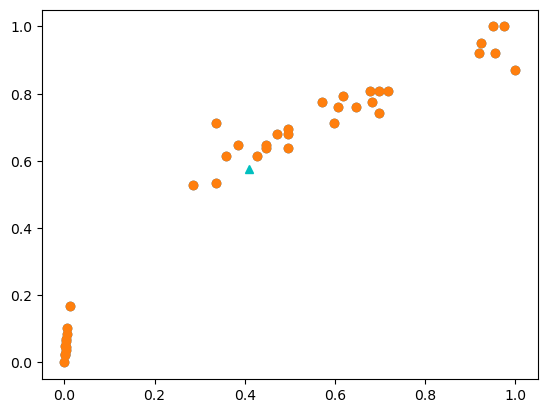

In [ ]:
### 시각화
# 도미 빙어 에 대한 시각화 >> 2개 피쳐 weight, length로 도미 빙어 분류 가능함
plt.scatter(x_train_Scaler[:,0], x_train_Scaler[:,1]) 
# plt.scatter(twoDF.loc[35: ,'Weight'], twoDF.loc[35: ,'Length'])
plt.plot(new_data_mmScaled[0,0], new_data_mmScaled[0,1], 'c^')
plt.scatter(k_weight,k_length)
plt.show()

In [ ]:
# 피쳐가 많다고 좋은건 아니다??
# 피쳐 스케일링 무조건하는게 맞지않나? 알맞는 알고리즘을 찾던지 뭘하던지 할라면
    # >>> 스케일링을 안했을때가 더 좋을때도 있다 >>> 어떤 스케일링인지 다 해봐야 한다. 